# Recommender System NuSa

## A. Import Library dan Data

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from faker import Faker
import matplotlib.pyplot as plt

import tabulate
from recsysNN_utils import *
pd.set_option("display.precision", 1)

2023-06-08 15:48:34.393408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 15:48:34.579944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-08 15:48:34.579983: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-08 15:48:35.420073: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### 1. Item Features

In [2]:
!gdown 1nEFzMbm5dTTphrSbnzTL1VH3kW3hFbgE
data = pd.read_excel('./tabelpokokgabungan.xlsx',sheet_name='rekomen_50_makanan')
data

Downloading...
From: https://drive.google.com/uc?id=1nEFzMbm5dTTphrSbnzTL1VH3kW3hFbgE
To: /work/tabelpokokgabungan.xlsx
100%|████████████████████████████████████████| 287k/287k [00:00<00:00, 19.2MB/s]


,No.,Food_ID,Nama Bahan Makanan,Fast_Food,Sumber,Tipe,Jenis_Olahan,Air (g),Energi (Kal),Protein (g),...,β-karoten (mcg),Karoten total (mcg),Thiamin (vit. B1) (mg),Riboflavin (vit. B2) (mg),Niasin (mg),Vitamin C (mg),BDD (%),Mentah / Olahan,Kelompok Makanan,Sumber TKPI 2019
0,1,FNT001,Bakso,Ya,Daging Sapi,Makanan Berat,Rebus,70.0,202,12.4,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Daging,0
1,2,FNT002,Bubur Ayam,Ya,"Beras, Daging Ayam",Makanan Berat,Rebus,80.0,155,11.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Serealia,0
2,3,FNT003,Mi Goreng,Ya,Tepung,Makanan Berat,Rebus,0.0,475,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Serealia,0
3,4,FNT004,Sate,Tidak,"Daging Ayam, Daging Kambing",Makanan Berat,Bakar,0.0,225,19.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Daging,0
4,5,FNT005,Soto,Tidak,"Daging Ayam, Daging Sapi",Makanan Berat,Rebus,70.0,130,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Daging,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,FNT147,Kue Sus,Tidak,Tepung,Makanan Ringan,Kukus,56.6,221,7.5,...,0.0,1.3,0.1,0.0,0.0,0.0,100,Olahan,Serealia,KZGMS01993
147,148,FNT148,Martabak Mesir,Tidak,"Tepung, Telur, Daging Ayam, Daging Sapi",Makanan Berat,Goreng,40.2,278,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Serealia,KZGMI02001
148,149,FNT149,Mie Aceh Rebus,Tidak,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,74.6,113,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100,Olahan,Serealia,KZGMI02001
149,150,FNT150,Mie Pangsit Basah,Tidak,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,79.2,105,5.9,...,0.0,620.0,0.5,0.0,0.0,0.0,100,Olahan,Serealia,KZGMS01993


### 2. User Features

- Age
- Body Weight
- Body Height
- Amount of Calorie that user need per day
- Sex or Gender

### Blood group, username, name, sex, address, mail

In [3]:
import pandas as pd 

generateProfile = Faker()
Faker.seed(29)

# generate 1000 profiles 
data_2 = [generateProfile.profile() for i in range(151)]

# save profiles in pandas dataframe
df = pd.DataFrame(data_2)

df

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,Sports therapist,Reed PLC,296-12-8362,"PSC 6600, Box 1735\nAPO AE 65760","(-1.604483, 146.298215)",O+,"[https://www.hamilton.org/, http://ramirez-chr...",nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com,1928-08-15
1,IT sales professional,"Golden, Hale and Coffey",752-94-3363,"66826 Kelly Branch\nLake Benjaminport, DE 01470","(78.5461575, 98.245655)",A+,[http://www.baldwin.com/],jamesharmon,Cheryl Porter,F,"33835 Nicole Track Apt. 919\nLesliechester, WY...",robert92@yahoo.com,1962-11-23
2,Commercial art gallery manager,Williams-Jenkins,806-04-5324,"59768 Mark Mountains\nSouth Mariashire, IN 58914","(-43.3863555, 168.038314)",AB-,"[http://www.bryant.info/, https://www.hickman....",danielking,Michele Guzman,F,"PSC 0253, Box 3634\nAPO AA 71494",luis74@gmail.com,1997-02-17
3,Clothing/textile technologist,"Martin, Willis and Hart",672-33-1195,Unit 1332 Box 0455\nDPO AP 09361,"(-13.063555, 160.031159)",A-,"[https://pena.com/, http://browning.com/, http...",harrisshelby,Jennifer Bennett,F,"8488 Jonathan Streets Apt. 333\nLake Jamie, SD...",leonardpatricia@yahoo.com,2011-10-26
4,Cytogeneticist,Nelson Ltd,593-90-9916,"941 Christopher Valley Apt. 194\nEast Parker, ...","(-49.318413, 111.154700)",O-,"[http://johnson.biz/, http://davis.biz/]",james44,Richard Lynch,M,"4109 Hoffman Plains\nSouth Jessica, IL 44462",gabriella33@yahoo.com,1935-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Volunteer coordinator,Shaffer Group,410-90-2232,"359 Rachel Point Suite 944\nWest Jillberg, NH ...","(-73.4515295, 31.600132)",O-,"[http://lopez-lee.net/, https://www.henry-whit...",kevin04,Craig Morse,M,"4624 Beth Inlet\nPeterborough, KS 08688",adrienne45@gmail.com,2023-05-27
147,Water quality scientist,Walters Inc,740-16-9898,"10895 Daniels Cliff\nEast Stacey, SC 77640","(-54.841967, 31.283164)",AB-,[http://howard.com/],martinburch,Megan Clark,F,"396 Scott Fork\nHartmanchester, MP 67073",dchapman@gmail.com,1909-08-19
148,Heritage manager,"Rodriguez, Walker and Newman",804-58-7357,USNS Kelley\nFPO AA 38956,"(-81.368428, 84.224515)",B-,[https://www.jones.com/],nmoore,Crystal Castillo,F,"4416 Jon Trail Apt. 741\nSouth Andrew, NJ 09207",rebecca83@gmail.com,2008-05-04
149,Commissioning editor,"Morris, Fleming and Fleming",651-79-4114,"4045 Nelson Lock Apt. 834\nNew Anitaburgh, MP ...","(15.019430, 67.844652)",A-,"[http://www.cannon.com/, http://www.alexander....",vandrews,Kimberly Martin,F,"703 Johnson Fort\nSouth Jamieport, OR 94088",amandachapman@hotmail.com,1930-11-20


In [4]:
print(df.columns)  

Index(['job', 'company', 'ssn', 'residence', 'current_location', 'blood_group',
       'website', 'username', 'name', 'sex', 'address', 'mail', 'birthdate'],
      dtype='object')


In [5]:
df.drop('job', axis=1, inplace=True)
df.drop('company', axis=1, inplace=True)
df.drop('ssn', axis=1, inplace=True)
df.drop('residence', axis=1, inplace=True)
df.drop('current_location', axis=1, inplace=True)
df.drop('website', axis=1, inplace=True)
df.drop('birthdate', axis=1, inplace=True)

In [6]:
print(df.columns)

Index(['blood_group', 'username', 'name', 'sex', 'address', 'mail'], dtype='object')


In [7]:
df = df.sort_values(by='sex',ascending=False)
df

,blood_group,username,name,sex,address,mail
0,O+,nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com
102,O-,klinetimothy,Jesus Gonzales,M,18653 Thomas Groves Suite 735\nLake Walterside...,rebecca97@hotmail.com
98,AB+,afreeman,Brian Gonzalez,M,"6826 Bell Crescent\nNorth Joshuaberg, SD 98556",luisschmidt@yahoo.com
97,A-,vcoleman,Vincent Miller,M,"201 Laura Inlet Suite 850\nPort Beth, NE 27465",courtneyosborne@hotmail.com
96,A+,alvarezeric,Javier Moore,M,"99449 Shari Islands\nBrianshire, NY 78179",groy@yahoo.com
...,...,...,...,...,...,...
33,B+,jeffersonmary,Gina Berry,F,"944 Hampton Harbors Suite 804\nMillerburgh, KS...",sara33@yahoo.com
94,O+,thernandez,Leslie Fitzgerald,F,4452 Rhonda Center Apt. 290\nNorth Michaelfurt...,laurameyer@gmail.com
37,B+,smithshelby,Teresa Berry,F,USNV Johnson\nFPO AE 52846,ann77@hotmail.com
90,AB+,mwilliams,Anne Lee,F,"6192 Robertson Ridge Apt. 608\nWillieside, CT ...",anthony79@yahoo.com


#### Age

array([22, 29, 36, 12, 29, 28, 30, 30, 30, 19, 24, 21, 16, 29, 31, 18, 27,
       28, 38, 24, 24, 35, 23, 33, 27, 20, 38, 23, 26, 21, 35, 25, 14, 20,
       30, 25, 28, 23, 22, 28, 28, 15, 33, 17, 23, 19, 18, 41, 10, 25, 23,
       18, 11, 26, 29, 30, 15, 22, 40, 15, 22, 32, 25, 31, 26, 25, 19, 23,
       27, 30, 18, 23, 18, 31, 26, 21, 27, 34, 34, 28,  4, 26, 25, 30, 22,
       18, 26, 19, 26, 29, 33, 31, 36, 23, 24, 11, 22, 26, 35, 27, 36, 20,
       15, 28, 22, 24, 38, 22, 27, 32, 20, 18, 26, 21, 35, 29, 32, 32, 26,
       23, 26, 26, 21, 26, 20, 33, 21, 30, 24, 23, 26, 27, 19, 28, 28, 22,
       27, 29, 18, 20, 17, 21, 22, 24, 22, 20, 25, 20, 25, 25, 29])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  1.,  4.,  1.,
         2.,  8.,  5.,  8.,  7., 11., 10.,  7.,  9., 14.,  8.,  9.,  8.,
         8.,  4.,  4.,  4.,  2.,  4.,  3.,  0.,  3.,  0.,  2.]),
 array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
        30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.]),
 <BarContainer object of 37 artists>)

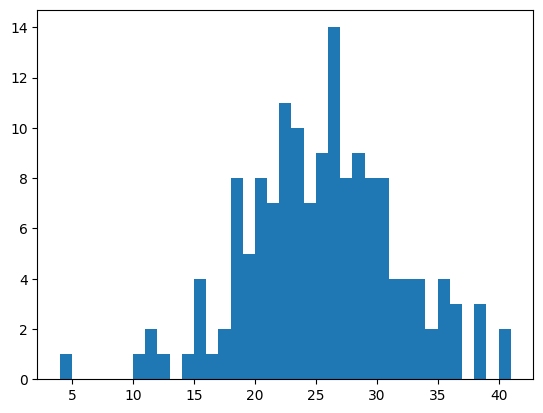

In [8]:
np.random.seed(seed=29)

randomNums = np.random.normal(loc=25, scale=6, size=151)
Age = np.round(randomNums).astype('int64')

axis = np.arange(start=min(Age), stop = max(Age) + 1)
display(Age)
plt.hist(Age, bins = axis)

##### Jika melihat rata-rata berat badan pria Indonesia yakni mencapai 61,4 Kg, juga diperingkat 115 dunia.

##### Sedangkan rata-rata berat badan wanita Indonesia mencapai 56,2 Kg, menempati posisi 116 dunia.

##### Survei tersebut juga mencatat bahwa tinggi badan pria rata-rata di Indonesia adalah 166,2 cm.

##### Sedangkan tinggi rata-rata wanita di Indonesia yaitu 154,3 cm. 

##### Sumber :
- https://indonesiabaik.id/infografis/seberapa-tinggi-penduduk-di-negaramu#:~:text=Rata%2DRata%20Tinggi%20Badan%20Penduduk%20Indonesia&text=Survei%20tersebut%20juga%20mencatat%20bahwa,Indonesia%20yaitu%20154%2C3%20cm.
- https://kabarbanten.pikiran-rakyat.com/nasional/pr-592383201/pria-indonesia-urutan-ke-115-rata-rata-tinggi-badan-dunia-belanda-paling-jangkung?page=2#:~:text=Jika%20melihat%20rata%2Drata%20berat,Kg%2C%20menempati%20posisi%20116%20dunia.
- https://www.emc.id/id/care-plus/perbedaan-kebutuhan-nutrisi-dan-kalori-bagi-pria-dan-wanita

#### Body Weight and Height and The Amount of Calorie that User Want per Day

In [9]:
!gdown 1nEFzMbm5dTTphrSbnzTL1VH3kW3hFbgE
weight_height_cal_need = pd.read_excel('./tabelpokokgabungan.xlsx',sheet_name='HeightWeight')
weight_height_cal_need

Downloading...
From: https://drive.google.com/uc?id=1nEFzMbm5dTTphrSbnzTL1VH3kW3hFbgE
To: /work/tabelpokokgabungan.xlsx
100%|████████████████████████████████████████| 287k/287k [00:00<00:00, 18.2MB/s]


,Sex,Body_Weight,Body_Height,Cal_Need,User_ID
0,M,54.1,160.3,1869.1,UNT001
1,M,61.3,154.8,1899.8,UNT002
2,M,50.9,156.6,1827.6,UNT003
3,M,53.7,155.6,1696.0,UNT004
4,M,52.1,157.4,1921.0,UNT005
...,...,...,...,...,...
146,F,50.2,149.1,2033.7,UNT147
147,F,56.5,151.9,1517.0,UNT148
148,F,56.7,155.0,1460.7,UNT149
149,F,55.8,152.5,1895.4,UNT150


### 3. Food Popularity Features
* 0 -> haven't eaten at all
* 1 - $\infty$ -> Already eat according to values

## B. Preprocessing Data

- Doing One-Hot Encoding to Categorical Variable

- Change Variable Type

### 1. Item Features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No.                        151 non-null    int64  
 1   Food_ID                    151 non-null    object 
 2   Nama Bahan Makanan         151 non-null    object 
 3   Fast_Food                  151 non-null    object 
 4   Sumber                     151 non-null    object 
 5   Tipe                       151 non-null    object 
 6   Jenis_Olahan               151 non-null    object 
 7   Air (g)                    151 non-null    float64
 8   Energi (Kal)               151 non-null    int64  
 9   Protein (g)                151 non-null    float64
 10  Lemak (g)                  151 non-null    float64
 11  Karbohidrat (g)            151 non-null    float64
 12  Serat (g)                  151 non-null    float64
 13  Abu (g)                    151 non-null    float64

In [11]:
for column in ['Fast_Food','Sumber','Tipe','Jenis_Olahan','Mentah / Olahan','Kelompok Makanan']:
    print(data[column].unique())

['Ya' 'Tidak']
['Daging Sapi' 'Beras, Daging Ayam' 'Tepung' 'Daging Ayam, Daging Kambing'
 'Daging Ayam, Daging Sapi' 'Daging Kambing' 'Daging Ayam'
 'Daging Ayam, Daging Kerbau' 'Daging Sapi, Daging Kerbau, Kedelai'
 'Kedelai' 'Biji-bijian' 'Buah' 'Beras' 'Beras, Ikan' 'Sayur'
 'Daging Babi' 'Daging Sapi, Daging Ayam' 'Ikan' 'Ikan, Telur'
 'Telur Ayam' 'Buah, Sayur' 'Susu'
 'Tepung, Telur, Daging Ayam, Daging Sapi' 'Tepung, Telur, Daging Ayam'
 'Umbi-umbian']
['Makanan Berat' 'Makanan Ringan']
['Rebus' 'Bakar' 'Mentah' 'Goreng' 'Panggang' 'Kukus' 'Gulai' 'Asap'
 'Presto' 'Tumis' 'Beku']
['Olahan' 'Tunggal']
['Daging' 'Serealia' 'Kacang' 'Buah' 'Sayur' 'Ikan dsb' 'Telur' 'Susu'
 'Umbi']


In [12]:
# Converting type of columns to category
data['Fast_Food'] = data['Fast_Food'].astype('category')
data['Tipe'] = data['Tipe'].astype('category')
data['Jenis_Olahan'] = data['Jenis_Olahan'].astype('category')
data['Mentah / Olahan'] = data['Mentah / Olahan'].astype('category')
data['Kelompok Makanan'] = data['Kelompok Makanan'].astype('category')

In [13]:
# Assigning numerical values and storing it in another columns
data['Fast_Food_New'] = data['Fast_Food'].cat.codes
data['Tipe_New'] = data['Tipe'].cat.codes
data['Jenis_Olahan_New'] = data['Jenis_Olahan'].cat.codes
data['Mentah / Olahan_New'] = data['Mentah / Olahan'].cat.codes
data['Kelompok Makanan_New'] = data['Kelompok Makanan'].cat.codes

In [14]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(data[['Fast_Food_New', 'Tipe_New','Jenis_Olahan_New','Mentah / Olahan_New','Kelompok Makanan_New']]).toarray())
enc_data.columns = enc.get_feature_names_out()

# Merge with main
new_data = data.join(enc_data)

In [15]:
# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict

for column in ['Fast_Food','Tipe','Jenis_Olahan','Mentah / Olahan','Kelompok Makanan']:
    print(column + ' : ', dict(OrderedDict(sorted(dict(zip(data[column].cat.codes, data[column])).items()))))

Fast_Food :  {0: 'Tidak', 1: 'Ya'}
Tipe :  {0: 'Makanan Berat', 1: 'Makanan Ringan'}
Jenis_Olahan :  {0: 'Asap', 1: 'Bakar', 2: 'Beku', 3: 'Goreng', 4: 'Gulai', 5: 'Kukus', 6: 'Mentah', 7: 'Panggang', 8: 'Presto', 9: 'Rebus', 10: 'Tumis'}
Mentah / Olahan :  {0: 'Olahan', 1: 'Tunggal'}
Kelompok Makanan :  {0: 'Buah', 1: 'Daging', 2: 'Ikan dsb', 3: 'Kacang', 4: 'Sayur', 5: 'Serealia', 6: 'Susu', 7: 'Telur', 8: 'Umbi'}


In [16]:
#MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data['Sumber_New'] = [x.split(",") for x in data['Sumber']]
mlb_data = pd.DataFrame(mlb.fit_transform(data['Sumber_New']),columns=mlb.classes_, index=data.index)

In [17]:
mlb_data

,Daging Ayam,Daging Kambing,Daging Kerbau,Daging Sapi,Ikan,Kedelai,Sayur,Telur,Beras,Biji-bijian,...,Daging Babi,Daging Kambing,Daging Sapi,Ikan,Kedelai,Sayur,Susu,Telur Ayam,Tepung,Umbi-umbian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
147,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
148,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
149,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Merge with main
new_data_final = new_data.join(mlb_data)
new_data_final

,No.,Food_ID,Nama Bahan Makanan,Fast_Food,Sumber,Tipe,Jenis_Olahan,Air (g),Energi (Kal),Protein (g),...,Daging Babi,Daging Kambing,Daging Sapi,Ikan,Kedelai,Sayur,Susu,Telur Ayam,Tepung,Umbi-umbian
0,1,FNT001,Bakso,Ya,Daging Sapi,Makanan Berat,Rebus,70.0,202,12.4,...,0,0,1,0,0,0,0,0,0,0
1,2,FNT002,Bubur Ayam,Ya,"Beras, Daging Ayam",Makanan Berat,Rebus,80.0,155,11.5,...,0,0,0,0,0,0,0,0,0,0
2,3,FNT003,Mi Goreng,Ya,Tepung,Makanan Berat,Rebus,0.0,475,10.0,...,0,0,0,0,0,0,0,0,1,0
3,4,FNT004,Sate,Tidak,"Daging Ayam, Daging Kambing",Makanan Berat,Bakar,0.0,225,19.5,...,0,0,0,0,0,0,0,0,0,0
4,5,FNT005,Soto,Tidak,"Daging Ayam, Daging Sapi",Makanan Berat,Rebus,70.0,130,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,FNT147,Kue Sus,Tidak,Tepung,Makanan Ringan,Kukus,56.6,221,7.5,...,0,0,0,0,0,0,0,0,1,0
147,148,FNT148,Martabak Mesir,Tidak,"Tepung, Telur, Daging Ayam, Daging Sapi",Makanan Berat,Goreng,40.2,278,5.1,...,0,0,0,0,0,0,0,0,1,0
148,149,FNT149,Mie Aceh Rebus,Tidak,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,74.6,113,3.0,...,0,0,0,0,0,0,0,0,1,0
149,150,FNT150,Mie Pangsit Basah,Tidak,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,79.2,105,5.9,...,0,0,0,0,0,0,0,0,1,0


### 2. User Features

In [19]:
df

,blood_group,username,name,sex,address,mail
0,O+,nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com
102,O-,klinetimothy,Jesus Gonzales,M,18653 Thomas Groves Suite 735\nLake Walterside...,rebecca97@hotmail.com
98,AB+,afreeman,Brian Gonzalez,M,"6826 Bell Crescent\nNorth Joshuaberg, SD 98556",luisschmidt@yahoo.com
97,A-,vcoleman,Vincent Miller,M,"201 Laura Inlet Suite 850\nPort Beth, NE 27465",courtneyosborne@hotmail.com
96,A+,alvarezeric,Javier Moore,M,"99449 Shari Islands\nBrianshire, NY 78179",groy@yahoo.com
...,...,...,...,...,...,...
33,B+,jeffersonmary,Gina Berry,F,"944 Hampton Harbors Suite 804\nMillerburgh, KS...",sara33@yahoo.com
94,O+,thernandez,Leslie Fitzgerald,F,4452 Rhonda Center Apt. 290\nNorth Michaelfurt...,laurameyer@gmail.com
37,B+,smithshelby,Teresa Berry,F,USNV Johnson\nFPO AE 52846,ann77@hotmail.com
90,AB+,mwilliams,Anne Lee,F,"6192 Robertson Ridge Apt. 608\nWillieside, CT ...",anthony79@yahoo.com


In [20]:
Age

array([22, 29, 36, 12, 29, 28, 30, 30, 30, 19, 24, 21, 16, 29, 31, 18, 27,
       28, 38, 24, 24, 35, 23, 33, 27, 20, 38, 23, 26, 21, 35, 25, 14, 20,
       30, 25, 28, 23, 22, 28, 28, 15, 33, 17, 23, 19, 18, 41, 10, 25, 23,
       18, 11, 26, 29, 30, 15, 22, 40, 15, 22, 32, 25, 31, 26, 25, 19, 23,
       27, 30, 18, 23, 18, 31, 26, 21, 27, 34, 34, 28,  4, 26, 25, 30, 22,
       18, 26, 19, 26, 29, 33, 31, 36, 23, 24, 11, 22, 26, 35, 27, 36, 20,
       15, 28, 22, 24, 38, 22, 27, 32, 20, 18, 26, 21, 35, 29, 32, 32, 26,
       23, 26, 26, 21, 26, 20, 33, 21, 30, 24, 23, 26, 27, 19, 28, 28, 22,
       27, 29, 18, 20, 17, 21, 22, 24, 22, 20, 25, 20, 25, 25, 29])

In [21]:
weight_height_cal_need.iloc[:,1:]

,Body_Weight,Body_Height,Cal_Need,User_ID
0,54.1,160.3,1869.1,UNT001
1,61.3,154.8,1899.8,UNT002
2,50.9,156.6,1827.6,UNT003
3,53.7,155.6,1696.0,UNT004
4,52.1,157.4,1921.0,UNT005
...,...,...,...,...
146,50.2,149.1,2033.7,UNT147
147,56.5,151.9,1517.0,UNT148
148,56.7,155.0,1460.7,UNT149
149,55.8,152.5,1895.4,UNT150


In [22]:
df['Age']=Age
df

,blood_group,username,name,sex,address,mail,Age
0,O+,nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com,22
102,O-,klinetimothy,Jesus Gonzales,M,18653 Thomas Groves Suite 735\nLake Walterside...,rebecca97@hotmail.com,29
98,AB+,afreeman,Brian Gonzalez,M,"6826 Bell Crescent\nNorth Joshuaberg, SD 98556",luisschmidt@yahoo.com,36
97,A-,vcoleman,Vincent Miller,M,"201 Laura Inlet Suite 850\nPort Beth, NE 27465",courtneyosborne@hotmail.com,12
96,A+,alvarezeric,Javier Moore,M,"99449 Shari Islands\nBrianshire, NY 78179",groy@yahoo.com,29
...,...,...,...,...,...,...,...
33,B+,jeffersonmary,Gina Berry,F,"944 Hampton Harbors Suite 804\nMillerburgh, KS...",sara33@yahoo.com,25
94,O+,thernandez,Leslie Fitzgerald,F,4452 Rhonda Center Apt. 290\nNorth Michaelfurt...,laurameyer@gmail.com,20
37,B+,smithshelby,Teresa Berry,F,USNV Johnson\nFPO AE 52846,ann77@hotmail.com,25
90,AB+,mwilliams,Anne Lee,F,"6192 Robertson Ridge Apt. 608\nWillieside, CT ...",anthony79@yahoo.com,25


In [23]:
df_final = df.join(weight_height_cal_need.iloc[:,1:])
df_final

,blood_group,username,name,sex,address,mail,Age,Body_Weight,Body_Height,Cal_Need,User_ID
0,O+,nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com,22,54.1,160.3,1869.1,UNT001
102,O-,klinetimothy,Jesus Gonzales,M,18653 Thomas Groves Suite 735\nLake Walterside...,rebecca97@hotmail.com,29,54.5,154.7,1888.1,UNT103
98,AB+,afreeman,Brian Gonzalez,M,"6826 Bell Crescent\nNorth Joshuaberg, SD 98556",luisschmidt@yahoo.com,36,59.3,160.6,2012.3,UNT099
97,A-,vcoleman,Vincent Miller,M,"201 Laura Inlet Suite 850\nPort Beth, NE 27465",courtneyosborne@hotmail.com,12,68.9,158.4,1605.7,UNT098
96,A+,alvarezeric,Javier Moore,M,"99449 Shari Islands\nBrianshire, NY 78179",groy@yahoo.com,29,57.8,154.6,1805.3,UNT097
...,...,...,...,...,...,...,...,...,...,...,...
33,B+,jeffersonmary,Gina Berry,F,"944 Hampton Harbors Suite 804\nMillerburgh, KS...",sara33@yahoo.com,25,53.6,150.9,1865.1,UNT034
94,O+,thernandez,Leslie Fitzgerald,F,4452 Rhonda Center Apt. 290\nNorth Michaelfurt...,laurameyer@gmail.com,20,52.5,156.1,2037.9,UNT095
37,B+,smithshelby,Teresa Berry,F,USNV Johnson\nFPO AE 52846,ann77@hotmail.com,25,54.8,156.8,2162.8,UNT038
90,AB+,mwilliams,Anne Lee,F,"6192 Robertson Ridge Apt. 608\nWillieside, CT ...",anthony79@yahoo.com,25,59.8,154.2,1589.2,UNT091


In [24]:
#one hot encoding
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 104
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blood_group  151 non-null    object 
 1   username     151 non-null    object 
 2   name         151 non-null    object 
 3   sex          151 non-null    object 
 4   address      151 non-null    object 
 5   mail         151 non-null    object 
 6   Age          151 non-null    int64  
 7   Body_Weight  151 non-null    float64
 8   Body_Height  151 non-null    float64
 9   Cal_Need     151 non-null    float64
 10  User_ID      151 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 18.2+ KB


In [25]:
df_final['sex'] = df_final['sex'].astype('category')
df_final['blood_group'] = df_final['blood_group'].astype('category')

# Assigning numerical values and storing it in another columns
df_final['sex_new'] = df_final['sex'].cat.codes
df_final['blood_group_new'] = df_final['blood_group'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
  
enc_df = pd.DataFrame(enc.fit_transform(df_final[['sex_new', 'blood_group_new']]).toarray())
enc_df.columns = enc.get_feature_names_out()

# Merge with main
new_df_final = enc_df.join(df_final)

new_df_final

,sex_new_0,sex_new_1,blood_group_new_0,blood_group_new_1,blood_group_new_2,blood_group_new_3,blood_group_new_4,blood_group_new_5,blood_group_new_6,blood_group_new_7,...,sex,address,mail,Age,Body_Weight,Body_Height,Cal_Need,User_ID,sex_new,blood_group_new
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com,22,54.1,160.3,1869.1,UNT001,1,6
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,F,"33835 Nicole Track Apt. 919\nLesliechester, WY...",robert92@yahoo.com,26,61.3,154.8,1899.8,UNT002,0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,F,"PSC 0253, Box 3634\nAPO AA 71494",luis74@gmail.com,20,50.9,156.6,1827.6,UNT003,0,3
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,F,"8488 Jonathan Streets Apt. 333\nLake Jamie, SD...",leonardpatricia@yahoo.com,22,53.7,155.6,1696.0,UNT004,0,1
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,M,"4109 Hoffman Plains\nSouth Jessica, IL 44462",gabriella33@yahoo.com,22,52.1,157.4,1921.0,UNT005,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,M,"4624 Beth Inlet\nPeterborough, KS 08688",adrienne45@gmail.com,25,50.2,149.1,2033.7,UNT147,1,7
147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,F,"396 Scott Fork\nHartmanchester, MP 67073",dchapman@gmail.com,23,56.5,151.9,1517.0,UNT148,0,3
148,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,F,"4416 Jon Trail Apt. 741\nSouth Andrew, NJ 09207",rebecca83@gmail.com,31,56.7,155.0,1460.7,UNT149,0,5
149,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,F,"703 Johnson Fort\nSouth Jamieport, OR 94088",amandachapman@hotmail.com,29,55.8,152.5,1895.4,UNT150,0,1


### 3. Food Popularity Features

In [26]:
tmp_data = pd.DataFrame()

for i in range(30):
    np.random.seed(seed=30+i)
    if i ==29:
        random_popularity = pd.DataFrame(np.random.default_rng().multinomial(10, [1/6.]*6, size=151))
        tmp_data = pd.concat([tmp_data,random_popularity],axis=1)
    else:
        random_popularity = pd.DataFrame(np.random.default_rng().multinomial(10, [1/5.]*5, size=151))
        tmp_data = pd.concat([tmp_data,random_popularity],axis=1)
tmp_data

,0,1,2,3,4,0,1,2,3,4,...,1,2,3,4,0,1,2,3,4,5
0,1,2,0,3,4,1,3,2,2,2,...,2,2,3,1,1,3,2,1,0,3
1,4,1,3,0,2,1,1,1,4,3,...,2,2,3,3,1,2,1,3,2,1
2,1,2,4,2,1,3,1,1,1,4,...,2,2,3,1,3,1,1,3,0,2
3,3,1,4,2,0,1,3,2,3,1,...,2,0,2,3,0,3,2,2,2,1
4,1,2,3,1,3,1,1,1,4,3,...,1,1,2,3,0,2,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,3,2,1,2,1,2,3,2,2,...,3,5,0,1,1,1,1,2,4,1
147,5,1,1,0,3,3,2,1,1,3,...,2,1,1,2,2,1,2,2,2,1
148,0,2,2,3,3,1,2,2,2,3,...,3,1,3,2,2,0,3,0,2,3
149,1,3,2,3,1,3,1,2,3,1,...,0,1,3,4,1,3,1,0,4,1


In [27]:
tmp_data.columns = df_final['User_ID']
tmp_data['Food_ID'] = data['Food_ID']
food_popularity = tmp_data.copy().melt(['Food_ID'])
food_popularity

,Food_ID,User_ID,value
0,FNT001,UNT001,1
1,FNT002,UNT001,4
2,FNT003,UNT001,1
3,FNT004,UNT001,3
4,FNT005,UNT001,1
...,...,...,...
22796,FNT147,UNT105,1
22797,FNT148,UNT105,1
22798,FNT149,UNT105,3
22799,FNT150,UNT105,1


## C. Training Reccomendation System

In [28]:
food_data = new_data_final.set_index('Food_ID').reset_index().drop(new_data_final.columns[[0,3,4,5,6,29,30,31,32,33,34,35,36]],axis = 1).copy()
food_data['Food_ID'] = food_data['Food_ID'].astype('str')
food_data.head()

,Food_ID,Nama Bahan Makanan,Air (g),Energi (Kal),Protein (g),Lemak (g),Karbohidrat (g),Serat (g),Abu (g),Kalsium (Ca) (mg),...,Daging Babi,Daging Kambing,Daging Sapi,Ikan,Kedelai,Sayur,Susu,Telur Ayam,Tepung,Umbi-umbian
0,FNT001,Bakso,70.0,202,12.4,13.2,7.6,0.5,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,FNT002,Bubur Ayam,80.0,155,11.5,5.2,15.1,0.8,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,FNT003,Mi Goreng,0.0,475,10.0,15.0,65.0,2.5,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,FNT004,Sate,0.0,225,19.5,14.8,4.9,1.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,FNT005,Soto,70.0,130,10.0,6.2,8.1,0.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
user_data = new_df_final.set_index('User_ID').reset_index().drop(new_df_final.columns[[21,22]],axis = 1).copy()
user_data['User_ID'] = user_data['User_ID'].astype('str')
user_data

,User_ID,sex_new_0,sex_new_1,blood_group_new_0,blood_group_new_1,blood_group_new_2,blood_group_new_3,blood_group_new_4,blood_group_new_5,blood_group_new_6,...,blood_group,username,name,sex,address,mail,Age,Body_Weight,Body_Height,Cal_Need
0,UNT001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,O+,nsanders,Paul Sherman,M,"524 Haley Unions\nNew Raymondchester, SC 86398",nowens@hotmail.com,22,54.1,160.3,1869.1
1,UNT002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A+,jamesharmon,Cheryl Porter,F,"33835 Nicole Track Apt. 919\nLesliechester, WY...",robert92@yahoo.com,26,61.3,154.8,1899.8
2,UNT003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,AB-,danielking,Michele Guzman,F,"PSC 0253, Box 3634\nAPO AA 71494",luis74@gmail.com,20,50.9,156.6,1827.6
3,UNT004,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,A-,harrisshelby,Jennifer Bennett,F,"8488 Jonathan Streets Apt. 333\nLake Jamie, SD...",leonardpatricia@yahoo.com,22,53.7,155.6,1696.0
4,UNT005,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,O-,james44,Richard Lynch,M,"4109 Hoffman Plains\nSouth Jessica, IL 44462",gabriella33@yahoo.com,22,52.1,157.4,1921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,UNT147,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,O-,kevin04,Craig Morse,M,"4624 Beth Inlet\nPeterborough, KS 08688",adrienne45@gmail.com,25,50.2,149.1,2033.7
147,UNT148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,AB-,martinburch,Megan Clark,F,"396 Scott Fork\nHartmanchester, MP 67073",dchapman@gmail.com,23,56.5,151.9,1517.0
148,UNT149,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,B-,nmoore,Crystal Castillo,F,"4416 Jon Trail Apt. 741\nSouth Andrew, NJ 09207",rebecca83@gmail.com,31,56.7,155.0,1460.7
149,UNT150,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,A-,vandrews,Kimberly Martin,F,"703 Johnson Fort\nSouth Jamieport, OR 94088",amandachapman@hotmail.com,29,55.8,152.5,1895.4


In [30]:
food_popularity['Food_ID'] = food_popularity['Food_ID'].astype('str')
food_popularity = pd.merge(food_popularity, user_data, on="User_ID", how="left")
food_popularity = pd.merge(food_popularity, food_data, on="Food_ID", how="left")
food_popularity

,Food_ID,User_ID,value,sex_new_0,sex_new_1,blood_group_new_0,blood_group_new_1,blood_group_new_2,blood_group_new_3,blood_group_new_4,...,Daging Babi,Daging Kambing,Daging Sapi,Ikan,Kedelai,Sayur,Susu,Telur Ayam,Tepung,Umbi-umbian
0,FNT001,UNT001,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,FNT002,UNT001,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,FNT003,UNT001,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,FNT004,UNT001,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,FNT005,UNT001,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22796,FNT147,UNT105,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
22797,FNT148,UNT105,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
22798,FNT149,UNT105,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
22799,FNT150,UNT105,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
import tensorflow_recommenders as tfrs
from typing import Dict, Text

In [32]:
populars = tf.data.Dataset.from_tensor_slices(dict(food_popularity[['User_ID', 'Food_ID', 'value',
'sex_new_0','sex_new_1',
'blood_group_new_0', 'blood_group_new_1', 'blood_group_new_2',
'blood_group_new_3', 'blood_group_new_4', 'blood_group_new_5',
'blood_group_new_6', 'blood_group_new_7','Age', 'Body_Weight', 'Body_Height',
'Cal_Need','Fast_Food_New_0', 'Fast_Food_New_1', 'Tipe_New_0', 'Tipe_New_1',
'Jenis_Olahan_New_0', 'Jenis_Olahan_New_1', 'Jenis_Olahan_New_2',
'Jenis_Olahan_New_3', 'Jenis_Olahan_New_4', 'Jenis_Olahan_New_5',
'Jenis_Olahan_New_6', 'Jenis_Olahan_New_7', 'Jenis_Olahan_New_8',
'Jenis_Olahan_New_9', 'Jenis_Olahan_New_10', 'Mentah / Olahan_New_0',
'Mentah / Olahan_New_1', 'Kelompok Makanan_New_0',
'Kelompok Makanan_New_1', 'Kelompok Makanan_New_2',
'Kelompok Makanan_New_3', 'Kelompok Makanan_New_4',
'Kelompok Makanan_New_5', 'Kelompok Makanan_New_6',
'Kelompok Makanan_New_7', 'Kelompok Makanan_New_8', ' Daging Ayam',
' Daging Kambing', ' Daging Kerbau', ' Daging Sapi', ' Ikan',
' Kedelai', ' Sayur', ' Telur', 'Beras', 'Biji-bijian', 'Buah',
'Daging Ayam', 'Daging Babi', 'Daging Kambing', 'Daging Sapi', 'Ikan',
'Kedelai', 'Sayur', 'Susu', 'Telur Ayam', 'Tepung', 'Umbi-umbian',
'Air (g)', 'Energi (Kal)','Protein (g)', 'Lemak (g)', 'Karbohidrat (g)', 'Serat (g)',
'Abu (g)','Kalsium (Ca) (mg)', 'Fosfor (P) (mg)', 'Besi (Fe) (mg)',
'Natrium (Na) (mg)', 'Kalium (Ka) (mg)', 'Tembaga (Cu) (mg)',
'Seng (Zn) (mg)', 'Retinol (vit. A) (mcg)', 'β-karoten (mcg)',
'Karoten total (mcg)', 'Thiamin (vit. B1) (mg)',
'Riboflavin (vit. B2) (mg)', 'Niasin (mg)', 'Vitamin C (mg)', 'BDD (%)']]))
foods = tf.data.Dataset.from_tensor_slices(dict(food_data[['Food_ID','Fast_Food_New_0', 'Fast_Food_New_1', 'Tipe_New_0', 'Tipe_New_1',
'Jenis_Olahan_New_0', 'Jenis_Olahan_New_1', 'Jenis_Olahan_New_2',
'Jenis_Olahan_New_3', 'Jenis_Olahan_New_4', 'Jenis_Olahan_New_5',
'Jenis_Olahan_New_6', 'Jenis_Olahan_New_7', 'Jenis_Olahan_New_8',
'Jenis_Olahan_New_9', 'Jenis_Olahan_New_10', 'Mentah / Olahan_New_0',
'Mentah / Olahan_New_1', 'Kelompok Makanan_New_0',
'Kelompok Makanan_New_1', 'Kelompok Makanan_New_2',
'Kelompok Makanan_New_3', 'Kelompok Makanan_New_4',
'Kelompok Makanan_New_5', 'Kelompok Makanan_New_6',
'Kelompok Makanan_New_7', 'Kelompok Makanan_New_8', ' Daging Ayam',
' Daging Kambing', ' Daging Kerbau', ' Daging Sapi', ' Ikan',
' Kedelai', ' Sayur', ' Telur', 'Beras', 'Biji-bijian', 'Buah',
'Daging Ayam', 'Daging Babi', 'Daging Kambing', 'Daging Sapi', 'Ikan',
'Kedelai', 'Sayur', 'Susu', 'Telur Ayam', 'Tepung', 'Umbi-umbian',
'Air (g)', 'Energi (Kal)','Protein (g)', 'Lemak (g)', 'Karbohidrat (g)', 'Serat (g)',
'Abu (g)','Kalsium (Ca) (mg)', 'Fosfor (P) (mg)', 'Besi (Fe) (mg)',
'Natrium (Na) (mg)', 'Kalium (Ka) (mg)', 'Tembaga (Cu) (mg)',
'Seng (Zn) (mg)', 'Retinol (vit. A) (mcg)', 'β-karoten (mcg)',
'Karoten total (mcg)', 'Thiamin (vit. B1) (mg)',
'Riboflavin (vit. B2) (mg)', 'Niasin (mg)', 'Vitamin C (mg)', 'BDD (%)']]))

2023-06-08 15:48:45.335058: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-08 15:48:45.335112: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-08 15:48:45.335173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-00e0baf0-d9f8-46bb-b51f-83eaecbe1a8b): /proc/driver/nvidia/version does not exist
2023-06-08 15:48:45.335743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
foods_2 = tf.data.Dataset.from_tensor_slices(dict(food_data[['Food_ID','Air (g)']]))

In [34]:
USER_FEATURE_NUM = ['Age', 'Body_Weight', 'Body_Height','Cal_Need']
USER_FEATURE_CAT= ['sex_new_0','sex_new_1',
'blood_group_new_0', 'blood_group_new_1', 'blood_group_new_2',
'blood_group_new_3', 'blood_group_new_4', 'blood_group_new_5',
'blood_group_new_6', 'blood_group_new_7']

FOOD_FEATURE_NUM = ['Air (g)', 'Energi (Kal)','Protein (g)', 'Lemak (g)', 'Karbohidrat (g)', 'Serat (g)',
'Abu (g)','Kalsium (Ca) (mg)', 'Fosfor (P) (mg)', 'Besi (Fe) (mg)',
'Natrium (Na) (mg)', 'Kalium (Ka) (mg)', 'Tembaga (Cu) (mg)',
'Seng (Zn) (mg)', 'Retinol (vit. A) (mcg)', 'β-karoten (mcg)',
'Karoten total (mcg)', 'Thiamin (vit. B1) (mg)',
'Riboflavin (vit. B2) (mg)', 'Niasin (mg)', 'Vitamin C (mg)', 'BDD (%)']
FOOD_FEATURE_CAT = ['Fast_Food_New_0', 'Fast_Food_New_1', 'Tipe_New_0', 'Tipe_New_1',
'Jenis_Olahan_New_0', 'Jenis_Olahan_New_1', 'Jenis_Olahan_New_2',
'Jenis_Olahan_New_3', 'Jenis_Olahan_New_4', 'Jenis_Olahan_New_5',
'Jenis_Olahan_New_6', 'Jenis_Olahan_New_7', 'Jenis_Olahan_New_8',
'Jenis_Olahan_New_9', 'Jenis_Olahan_New_10', 'Mentah / Olahan_New_0',
'Mentah / Olahan_New_1', 'Kelompok Makanan_New_0',
'Kelompok Makanan_New_1', 'Kelompok Makanan_New_2',
'Kelompok Makanan_New_3', 'Kelompok Makanan_New_4',
'Kelompok Makanan_New_5', 'Kelompok Makanan_New_6',
'Kelompok Makanan_New_7', 'Kelompok Makanan_New_8', ' Daging Ayam',
' Daging Kambing', ' Daging Kerbau', ' Daging Sapi', ' Ikan',
' Kedelai', ' Sayur', ' Telur', 'Beras', 'Biji-bijian', 'Buah',
'Daging Ayam', 'Daging Babi', 'Daging Kambing', 'Daging Sapi', 'Ikan',
'Kedelai', 'Sayur', 'Susu', 'Telur Ayam', 'Tepung', 'Umbi-umbian']

In [35]:
print('Total Data: {}'.format(len(populars)))

tf.random.set_seed(42)
shuffled = populars.shuffle(10000, seed=42, reshuffle_each_iteration=False)

train = populars.take(19380)
test = populars.skip(19380).take(3421)

Total Data: 22801


```
populars = populars.map(lambda x: {
    "User_ID": x["User_ID"],
    "Food_ID": x["Food_ID"],
    "value": float(x["value"])
})

foods = foods.map(lambda x: x["Food_ID"])

food_names = foods.batch(100)
user_ids = populars.batch(100).map(lambda x: x["User_ID"])

unique_food_names = np.unique(np.concatenate(list(food_names)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

print('Unique foods: {}'.format(len(unique_food_names)))
print('Unique users: {}'.format(len(unique_user_ids)))
```

In [36]:
food_names = foods.batch(100).map(lambda x: x["Food_ID"])
user_ids = populars.batch(100).map(lambda x: x["User_ID"])

unique_food_names = np.unique(np.concatenate(list(food_names)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

print('Unique foods: {}'.format(len(unique_food_names)))
print('Unique users: {}'.format(len(unique_user_ids)))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Unique foods: 151
Unique users: 151


In [37]:
'''
    for user_feature_num in USER_FEATURE_NUM:
        self.user_feature_num_normalizer = tf.keras.layers.Normalization(axis=None)
        self.user_additional_embeddings[user_feature_num] = tf.keras.Sequential([self.user_feature_num_normalizer,
        tf.keras.layers.Reshape([1])])

    for food_feature_num in FOOD_FEATURE_NUM:
        self.food_feature_num_normalizer = tf.keras.layers.Normalization(axis=None)
        self.food_additional_embeddings[food_feature_num] = tf.keras.Sequential([self.food_feature_num_normalizer,
        tf.keras.layers.Reshape([1])])
'''

'\n    for user_feature_num in USER_FEATURE_NUM:\n        self.user_feature_num_normalizer = tf.keras.layers.Normalization(axis=None)\n        self.user_additional_embeddings[user_feature_num] = tf.keras.Sequential([self.user_feature_num_normalizer,\n        tf.keras.layers.Reshape([1])])\n\n    for food_feature_num in FOOD_FEATURE_NUM:\n        self.food_feature_num_normalizer = tf.keras.layers.Normalization(axis=None)\n        self.food_additional_embeddings[food_feature_num] = tf.keras.Sequential([self.food_feature_num_normalizer,\n        tf.keras.layers.Reshape([1])])\n'

In [38]:
class FoodModel(tfrs.models.Model):

  def __init__(self, popular_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights.

    super().__init__()

    embedding_dimension = 64

    # User and food models.
    self.food_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_food_names, mask_token=None),
      tf.keras.layers.Embedding(len(unique_food_names) + 1, embedding_dimension)
    ])
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # A small model to take in user and food embeddings and predict popularity.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.popular_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear"),
    ])

    # The tasks.
    self.popular_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=foods.batch(128).map(lambda x: x["Food_ID"]).map(self.food_model)
        )
    )

    # The loss weights.
    self.popular_weight = popular_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["User_ID"])
    # And pick out the food features and pass them into the food model.
    food_embeddings = self.food_model(features["Food_ID"])
    
    return (
        user_embeddings,
        food_embeddings,
        # We apply the multi-layered popular model to a concatentation of
        # user and food embeddings.
        self.popular_model(
            tf.concat([user_embeddings, food_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    populars = features.pop("value")

    user_embeddings, food_embeddings, popular_predictions = self(features)

    # We compute the loss for each task.
    popular_loss = self.popular_task(
        labels=populars,
        predictions=popular_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, food_embeddings)

    # And combine them using the loss weights.
    return (self.popular_weight * popular_loss + self.retrieval_weight * retrieval_loss)

In [39]:
model = FoodModel(popular_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

cached_train = train.shuffle(22800).batch(2048).cache()
cached_test = test.batch(2048).cache()

model.fit(cached_train, epochs=3)

Epoch 1/3
10/10 [==============================] - 7s 324ms/step - root_mean_squared_error: 1.5425 - factorized_top_k/top_1_categorical_accuracy: 5.6760e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0060 - factorized_top_k/top_10_categorical_accuracy: 0.0170 - factorized_top_k/top_50_categorical_accuracy: 0.1918 - factorized_top_k/top_100_categorical_accuracy: 0.5638 - loss: 13986.8116 - regularization_loss: 0.0000e+00 - total_loss: 13986.8116
Epoch 2/3
10/10 [==============================] - 3s 329ms/step - root_mean_squared_error: 1.2680 - factorized_top_k/top_1_categorical_accuracy: 5.6760e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0060 - factorized_top_k/top_10_categorical_accuracy: 0.0147 - factorized_top_k/top_50_categorical_accuracy: 0.1361 - factorized_top_k/top_100_categorical_accuracy: 0.4119 - loss: 13988.6584 - regularization_loss: 0.0000e+00 - total_loss: 13988.6584
Epoch 3/3
10/10 [==============================] - 2s 218ms/step - root_mean_squared_error

In [40]:
model.summary()

Model: "food_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                9728      
                                                                 
 sequential_1 (Sequential)   (None, 64)                9728      
                                                                 
 sequential_2 (Sequential)   (None, 1)                 66049     
                                                                 
 ranking (Ranking)           multiple                  0         
                                                                 
 retrieval (Retrieval)       multiple                  1         
                                                                 
Total params: 85,506
Trainable params: 85,505
Non-trainable params: 1
_________________________________________________________________


In [41]:
metrics = model.evaluate(cached_test, return_dict=True)

2/2 [==============================] - 1s 151ms/step - root_mean_squared_error: 1.2724 - factorized_top_k/top_1_categorical_accuracy: 0.0035 - factorized_top_k/top_5_categorical_accuracy: 0.0292 - factorized_top_k/top_10_categorical_accuracy: 0.0614 - factorized_top_k/top_50_categorical_accuracy: 0.3204 - factorized_top_k/top_100_categorical_accuracy: 0.6548 - loss: 11821.0397 - regularization_loss: 0.0000e+00 - total_loss: 11821.0397


In [42]:
foods_pred = foods.map(lambda x: x["Food_ID"])
def predict_food(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # recommends foods out of the entire foods dataset.
    index.index_from_dataset(
      tf.data.Dataset.zip((foods_pred.batch(100), foods_pred.batch(100).map(model.food_model)))
    )

    # Get recommendations.
    _, food_ids = index(tf.constant([str(user)]))
    
    print('Top {} recommendations for user {}:\n'.format(top_n, user))
    for i, food_id in enumerate(food_ids[0, :top_n].numpy()):
        print('{}. {} : {}'.format(i+1, food_id.decode("utf-8"), ''.join(list(food_data[food_data['Food_ID']==food_id.decode("utf-8")]['Nama Bahan Makanan']))))

def predict_popular(user, food):
    trained_food_embeddings, trained_user_embeddings, predicted_popular = model({
          "User_ID": np.array([str(user)]),
          "Food_ID": np.array([food])
      })
    print("Predicted popular for {}: {}".format(food, predicted_popular.numpy()[0][0]))

In [43]:
predict_food('UNT002', 5)

Top 5 recommendations for user UNT002:

1. FNT060 : Daging sapi asap
2. FNT040 : Ketupat kandangan
3. FNT150 : Mie Pangsit Basah
4. FNT041 : Kue ali
5. FNT135 : Salak


In [44]:
# Get meta data for predicted food
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# recommends foods out of the entire foods dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((foods_pred.batch(100), foods_pred.batch(100).map(model.food_model)))
)

# Get recommendations.
_, titles = index(tf.constant(['UNT002']))
pred_foods = pd.DataFrame({'Food_ID': [i.decode('utf-8') for i in titles[0,:5].numpy()]})

pred_df = pred_foods.merge(food_data[['Nama Bahan Makanan','Food_ID']], on='Food_ID', how='left')
pred_df.reset_index(drop=True, inplace=True)
pred_df.index = np.arange(1, len(pred_df)+1)

pred_df

,Food_ID,Nama Bahan Makanan
1,FNT060,Daging sapi asap
2,FNT040,Ketupat kandangan
3,FNT150,Mie Pangsit Basah
4,FNT041,Kue ali
5,FNT135,Salak


## D. Recommender System with all feature

In [45]:
#user
popular_age = populars.map(lambda x: x["Age"])


#food
food_water = foods.map(lambda x: x["Air (g)"])

In [46]:
class UserModel(tf.keras.Model):
  
  def __init__(self):
    super().__init__()

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
        tf.keras.layers.Embedding(len(unique_user_ids) + 1, 64),
    ])

    self.additional_feature = {}
    self.normalized = {}

    for feature in USER_FEATURE_NUM:
        self.normalized[feature] = tf.keras.layers.Normalization(axis=None)
        self.normalized[feature].adapt(populars.map(lambda x: x[feature]))
        self.additional_feature[feature] = tf.keras.Sequential([self.normalized[feature],tf.keras.layers.Reshape([1])])
    
  def call(self, inputs):
    # Take the input dictionary, pass it through each input layer,
    # and concatenate the result.
    
    return tf.concat(
        [self.user_embedding(inputs["User_ID"])]+
        [self.additional_feature[k](inputs[k]) for k in self.additional_feature],
        axis=1)

In [47]:
class QueryModel(tf.keras.Model):
  """Model for encoding user queries."""

  def __init__(self, layer_sizes, popular_weight=1, retrieval_weight=1):
    """Model for encoding user queries.

    Args:
      layer_sizes:
        A list of integers where the i-th entry represents the number of units
        the i-th layer contains.
    """
    super().__init__()

    # We first use the user model for generating embeddings.
    self.user_embedding_model = UserModel()

    # Then construct the layers.
    self.dense_layers = tf.keras.Sequential()

    # Use the ReLU activation
    self.dense_layers.add(tf.keras.layers.Dense(512, activation="relu"))
    self.dense_layers.add(tf.keras.layers.Dense(256, activation="relu"))

  def call(self, inputs):
    feature_embedding = self.user_embedding_model(inputs)
    return self.dense_layers(feature_embedding)

In [48]:
class FoodModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    self.food_embedding = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
          vocabulary=unique_food_names,mask_token=None),
      tf.keras.layers.Embedding(len(unique_food_names) + 1, 64)
    ])

    self.normalized_water = tf.keras.layers.Normalization(axis=None)
    self.normalized_water.adapt(food_water)

  def call(self, inputs):
      return tf.concat([
          self.food_embedding(inputs["Food_ID"]),
          tf.reshape(self.normalized_water(inputs["Air (g)"]), (-1, 1)),
          ], axis=1)

In [49]:
class CandidateModel(tf.keras.Model):
  """Model for encoding movies."""

  def __init__(self, layer_sizes, popular_weight=1, retrieval_weight=1):
    """Model for encoding movies.

    Args:
      layer_sizes:
        A list of integers where the i-th entry represents the number of units
        the i-th layer contains.
    """
    super().__init__()

    self.food_embedding_model = FoodModel()

    # Then construct the layers.
    self.dense_layers = tf.keras.Sequential()

    # Use the ReLU activation.
    self.dense_layers.add(tf.keras.layers.Dense(512, activation="relu"))
    self.dense_layers.add(tf.keras.layers.Dense(256, activation="relu"))

  def call(self, inputs):
    feature_embedding = self.food_embedding_model(inputs)
    return self.dense_layers(feature_embedding)

In [50]:
class FoodlensModel(tfrs.models.Model):

  def __init__(self, layer_sizes, popular_weight=1, retrieval_weight=1):
    super().__init__()
    self.query_model = QueryModel(layer_sizes)
    self.candidate_model = CandidateModel(layer_sizes)

    self.popular_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.popular_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=foods.apply(tf.data.experimental.dense_to_ragged_batch(128)).map(self.candidate_model)
        )
    )

    # The loss weights.
    self.popular_weight = popular_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor], training=True) -> tf.Tensor:
      
      query_embeddings = self.query_model({"User_ID": features["User_ID"],
      **{k: features[k] for k in USER_FEATURE_NUM}
      })
      food_embeddings = self.candidate_model({"Food_ID": features["Food_ID"],"Air (g)": features["Air (g)"]})

      output_dot = tf.concat([query_embeddings, food_embeddings],axis=1)

      return self.popular_model(output_dot)

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    query_embeddings = self.query_model({
        "User_ID": features["User_ID"],
        **{k: features[k] for k in USER_FEATURE_NUM}
        })
    food_embeddings = self.candidate_model({
        "Food_ID": features["Food_ID"],
        "Air (g)": features["Air (g)"]})

    #populars = features.pop("value")

    popular_predictions = self(features)

    # We compute the loss for each task.
    popular_loss = self.popular_task(
        labels=features['value'],
        predictions=popular_predictions)

    retrieval_loss = self.retrieval_task(query_embeddings, food_embeddings, compute_metrics=not training)

    return (self.popular_weight * popular_loss + self.retrieval_weight * retrieval_loss)

In [51]:
tf.random.set_seed(42)
shuffled = populars.shuffle(10000, seed=42, reshuffle_each_iteration=False)

train = populars.take(19380)
test = populars.skip(19380).take(3421)

cached_train = train.shuffle(22800).batch(2048).cache()
cached_test = test.batch(2048).cache()

In [52]:
model = FoodlensModel(layer_sizes=[64,32],popular_weight=1, retrieval_weight=1)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
history = model.fit(cached_train,validation_data=cached_test, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 8s 641ms/step - root_mean_squared_error: 72.5623 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 117111.2472 - regularization_loss: 0.0000e+00 - total_loss: 117111.2472 - val_root_mean_squared_error: 1.7241 - val_factorized_top_k/top_1_categorical_accuracy: 0.0056 - val_factorized_top_k/top_5_categorical_accuracy: 0.0313 - val_factorized_top_k/top_10_categorical_accuracy: 0.0649 - val_factorized_top_k/top_50_categorical_accuracy: 0.3268 - val_factorized_top_k/top_100_categorical_accuracy: 0.6592 - val_loss: 10396.9902 - val_regularization_loss: 0.0000e+00 - val_total_loss: 10396.9902
Epoch 2/10
10/10 [==============================] - 4s 443ms/step - root_mean_squared_error: 1.4773 - f

In [53]:
accuracy = history.history["val_factorized_top_k/top_100_categorical_accuracy"][-1]
print(f"Top-100 accuracy: {accuracy:.2f}.")

Top-100 accuracy: 0.66.


In [54]:
model.summary()

Model: "foodlens_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 query_model (QueryModel)    multiple                  176396    
                                                                 
 candidate_model (CandidateM  multiple                 174851    
 odel)                                                           
                                                                 
 sequential_11 (Sequential)  (None, 1)                 164353    
                                                                 
 ranking_1 (Ranking)         multiple                  0         
                                                                 
 retrieval_1 (Retrieval)     multiple                  1         
                                                                 
Total params: 515,601
Trainable params: 515,585
Non-trainable params: 16
_____________________________________________

In [55]:
metrics = model.evaluate(cached_test, return_dict=True)

2/2 [==============================] - 0s 174ms/step - root_mean_squared_error: 1.2856 - factorized_top_k/top_1_categorical_accuracy: 0.0056 - factorized_top_k/top_5_categorical_accuracy: 0.0313 - factorized_top_k/top_10_categorical_accuracy: 0.0640 - factorized_top_k/top_50_categorical_accuracy: 0.3283 - factorized_top_k/top_100_categorical_accuracy: 0.6592 - loss: 12484.6491 - regularization_loss: 0.0000e+00 - total_loss: 12484.6491


In [56]:
cek_user_id = 'UNT023'
new_df_final[new_df_final['User_ID']==cek_user_id]

,sex_new_0,sex_new_1,blood_group_new_0,blood_group_new_1,blood_group_new_2,blood_group_new_3,blood_group_new_4,blood_group_new_5,blood_group_new_6,blood_group_new_7,...,sex,address,mail,Age,Body_Weight,Body_Height,Cal_Need,User_ID,sex_new,blood_group_new
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,M,"65757 Dean Hills\nChavezland, KS 98325",rfleming@hotmail.com,34,64.3,163.3,2074.8,UNT023,1,1


In [57]:
cek_user_id = 'UNT025'
brute_force = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
brute_force = brute_force.index_from_dataset(foods.apply(tf.data.experimental.dense_to_ragged_batch(128)).map(model.candidate_model))
brute_force({
    "User_ID": tf.constant([cek_user_id]),
    **{k: tf.constant([list(new_df_final[new_df_final['User_ID']==cek_user_id][k])[0]]) for k in USER_FEATURE_NUM}
    })

(<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[4.2099657, 4.1498814, 4.072132 , 4.0476565, 3.8783178, 3.8687923,
         3.697832 , 3.6756299, 3.665897 , 3.5303998]], dtype=float32)>,
 <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[  5,  11,  24, 128,   6,  45,  21,  46, 106,  94]], dtype=int32)>)

In [88]:
#prediksi popularitas
cek_user_id = 'UNT025'
model.predict({"User_ID": tf.constant([cek_user_id]),
**{k: tf.constant([list(new_df_final[new_df_final['User_ID']==cek_user_id][k])[0]]) for k in USER_FEATURE_NUM},
"Food_ID":tf.constant(['FNT018']),
"Air (g)":tf.constant([75])})

1/1 [==============================] - 0s 17ms/step


array([[1.801869]], dtype=float32)

In [59]:
cek_food_uid = food_popularity["Food_ID"]=='FNT018'
cek_user_uid = food_popularity["User_ID"]=='UNT025'
food_popularity[cek_food_uid&cek_user_uid][["User_ID","Age","value","Food_ID","Air (g)"]]

,User_ID,Age,value,Food_ID,Air (g)
20553,UNT025,27,1,FNT018,75.0


In [164]:
def predict_food(input_dict,output_type ,top_n=3):
    USER_FEATURE_NUM = ['Age', 'Body_Weight', 'Body_Height','Cal_Need']
    
    USER_FEATURE_CAT= ['sex_new_0','sex_new_1',
    'blood_group_new_0', 'blood_group_new_1', 'blood_group_new_2',
    'blood_group_new_3', 'blood_group_new_4', 'blood_group_new_5',
    'blood_group_new_6', 'blood_group_new_7']

    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
    
    # recommends foods out of the entire foods dataset.
    index.index_from_dataset(foods.apply(tf.data.experimental.dense_to_ragged_batch(128)).map(model.candidate_model))

    recommended_food = brute_force({
    "User_ID": tf.constant([input_dict['User_ID']]),
    **{k: tf.constant([input_dict[k]]) for k in USER_FEATURE_NUM}
    })
    
    if output_type=="print":
        print('Top {} recommendations for user {}:\n'.format(top_n, input_dict['User_ID']))
        for i, food_id in enumerate(recommended_food[1].numpy()[0,:top_n]):
            print('{}. {} : {}'.format(i+1, list(new_data_final[new_data_final["No."]==food_id]["Food_ID"])[0], list(new_data_final[new_data_final["No."]==food_id]["Nama Bahan Makanan"])[0]))
    
    if output_type=="dataframe":
        df_output = pd.DataFrame()
        df_output['index_number'] = list(range(1,top_n+1))
        df_output['list_food_id'] = [list(new_data_final[new_data_final["No."]==index]["Food_ID"])[0] for index in recommended_food[1].numpy()[0,:top_n]]
        df_output['list_food_name'] = [list(new_data_final[new_data_final["No."]==index]["Nama Bahan Makanan"])[0] for index in recommended_food[1].numpy()[0,:top_n]]
        return df_output


def predict_popular(dict_new_user,dict_food_data):
    input_dict_total = dict(dict_new_user)
    input_dict_total.update(dict_food_data)
    input_dict_total= {k: tf.constant([input_dict_total[k]]) for k in input_dict_total}
    predicted_popular = model.predict(input_dict_total)
    print("Predicted popular for {} or {}: {}".format(input_dict_total['Food_ID'][0].numpy().decode("utf-8"), list(food_data[food_data['Food_ID']==input_dict_total['Food_ID'][0].numpy().decode("utf-8")]['Nama Bahan Makanan'])[0],predicted_popular[0,0]))

In [165]:
#Predict Food Output Print
dict_new_user = {
    "User_ID":"UNT151",
    "Age":30,
    "Body_Weight":75,
    "Body_Height":165,
    "Cal_Need":2100
    }
predict_food(dict_new_user,'print',5)

Top 5 recommendations for user UNT151:

1. FNT145 : Bika Ambon
2. FNT096 : Telur mata sapi
3. FNT063 : Sosis sapi
4. FNT074 : Ikan Patin bakar
5. FNT067 : Belut goreng


In [166]:
#Predict Food Output Dataframe
predict_food(dict_new_user,'dataframe',5)

,index_number,list_food_id,list_food_name
0,1,FNT145,Bika Ambon
1,2,FNT096,Telur mata sapi
2,3,FNT063,Sosis sapi
3,4,FNT074,Ikan Patin bakar
4,5,FNT067,Belut goreng


In [168]:
#Predict Popularity
dict_food_data = {
    "Food_ID":"FNT018",
    "Air (g)":75
}
predict_popular(dict_new_user,dict_food_data)

1/1 [==============================] - 0s 47ms/step
Predicted popular for FNT018 or Soto padang: 1.877756118774414


# Custom Loss for Nutrition Needs

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00e0baf0-d9f8-46bb-b51f-83eaecbe1a8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>